<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_5_Decision_Tree_(Fraud_Check_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fraud Checks

#Import Libraries/ Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# import some data to play with
fraud_df = pd.read_csv('/content/Fraud_check.csv')

In [ ]:
fraud_df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#Data Understanding

In [ ]:
fraud_df.shape

(600, 6)

In [ ]:
fraud_df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud_df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fraud_df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
# Classifying taxable income into categorical data type
Fraud_Check = []
for value in fraud_df["Taxable.Income"]:
    if value <= 30000:
        Fraud_Check.append(1)  #1 is 'yes' and 0 is 'no'
    else:
        Fraud_Check.append(0)
       
fraud_df["Fraud_Check"] = Fraud_Check   
print(fraud_df)

    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  Fraud_Check  
0                 10   YES            0  
1                 18   YES            0  
2                 30   YES            0  
3                 15   YES            0  
4        

In [ ]:
fraud_df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0


In [ ]:
fraud_df['Fraud_Check'].value_counts()

0    476
1    124
Name: Fraud_Check, dtype: int64

In [ ]:
fraud_df=pd.get_dummies(fraud_df)

In [ ]:
fraud_df.head()

,Taxable.Income,City.Population,Work.Experience,Fraud_Check,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,0,1,0,0,0,1,0,1
1,33700,134075,18,0,0,1,1,0,0,0,1
2,36925,160205,30,0,1,0,0,1,0,0,1
3,50190,193264,15,0,0,1,0,0,1,0,1
4,81002,27533,28,0,1,0,0,1,0,1,0


In [ ]:
X = fraud_df.drop(labels = ['Taxable.Income','Fraud_Check'],axis = 1)
y = fraud_df[['Fraud_Check']]
X.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [ ]:
y.head()

,Fraud_Check
0,0
1,0
2,0
3,0
4,0


In [ ]:
fraud_df.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Fraud_Check',
       'Undergrad_NO', 'Undergrad_YES', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_NO',
       'Urban_YES'],
      dtype='object')

In [ ]:
y.head()

,Fraud_Check
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.shape, y.shape

((600, 9), (600, 1))

#Model Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler = min_max_scaler.fit_transform(X) #intelligence is stored in this variable
X_scaled = pd.DataFrame(data = min_max_scaler,columns =X.columns )

In [ ]:
X_scaled.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_scaled.mean()

City.Population            0.476832
Work.Experience            0.518611
Undergrad_NO               0.480000
Undergrad_YES              0.520000
Marital.Status_Divorced    0.315000
Marital.Status_Married     0.323333
Marital.Status_Single      0.361667
Urban_NO                   0.496667
Urban_YES                  0.503333
dtype: float64

In [ ]:
X_scaled.std()

City.Population            0.286496
Work.Experience            0.294738
Undergrad_NO               0.500017
Undergrad_YES              0.500017
Marital.Status_Divorced    0.464903
Marital.Status_Married     0.468139
Marital.Status_Single      0.480884
Urban_NO                   0.500406
Urban_YES                  0.500406
dtype: float64

#Model Building

In [ ]:
y.value_counts()  

Fraud_Check
0              476
1              124
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

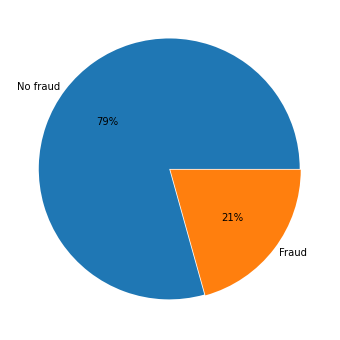

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(x=y.value_counts(),explode= [0.01,0],labels = ['No fraud','Fraud'], autopct='%1.0f%%', labeldistance = 1.05)
plt.show

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state= 12,shuffle= True, stratify = y)

In [ ]:
X_train.shape, y_train.shape

((480, 9), (480, 1))

<function matplotlib.pyplot.show(*args, **kw)>

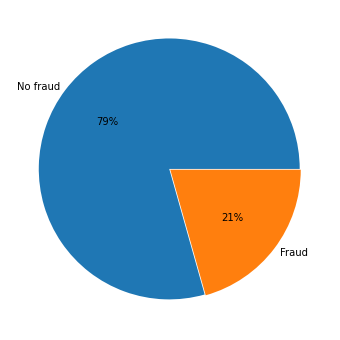

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(x=y_train.value_counts(),explode= [0.01,0],labels = ['No fraud','Fraud'], autopct='%1.0f%%', labeldistance = 1.05)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

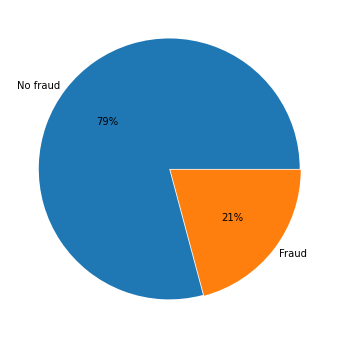

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(x=y_test.value_counts(),explode= [0.01,0],labels = ['No fraud','Fraud'], autopct='%1.0f%%', labeldistance = 1.05)
plt.show

#Hyper-Parameter Optimization

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = model,
                            param_grid = {'criterion': ['gini','entropy'],
                                          'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
                                          },
                            cv = 5)

In [ ]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1}

#Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 1,class_weight = {0:1,1:4})
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, max_depth=1)

#Model Testing | Model Evaluation

Training Data

In [ ]:
y_pred_train = dt_model.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report:\n', classification_report(y_train,y_pred_train))
print('======================================================================')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08       381
           1       0.21      1.00      0.35        99

    accuracy                           0.24       480
   macro avg       0.61      0.52      0.22       480
weighted avg       0.84      0.24      0.14       480

Confusion Matrix:
 [[ 16 365]
 [  0  99]]


In [ ]:
train_accuracy = dt_model.score(X_train,y_train)
train_accuracy

0.23958333333333334

Test Data

In [ ]:
y_pred_test = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report:\n', classification_report(y_test,y_pred_test))
print('======================================================================')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.05      0.10        95
           1       0.20      0.88      0.32        25

    accuracy                           0.23       120
   macro avg       0.41      0.47      0.21       120
weighted avg       0.54      0.23      0.14       120

Confusion Matrix:
 [[ 5 90]
 [ 3 22]]


In [ ]:
#Find the accuracy
test_accuracy = dt_model.score(X_test,y_test)
test_accuracy

0.225

#Using Ensembel method to resolve overfitting problem

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(bootstrap=True, class_weight = {0:1,1:4},criterion='gini',n_estimators=15,random_state = 1)

In [ ]:
model_rf.fit(X_train,y_train)

<ipython-input-42-886240159eb4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


RandomForestClassifier(class_weight={0: 1, 1: 4}, n_estimators=15,
                       random_state=1)

In [ ]:
model_rf.score(X_train,y_train)

0.9833333333333333

In [ ]:
model_rf.score(X_test,y_test)

0.7

In [ ]:
#End